In [203]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import seaborn as sns
from scipy.stats import shapiro

In [69]:
#load the control data set

df_control_data = pd.read_csv(r'C:\Users\Tombra\A-and-B-testing\archive (7)\control_group.csv', sep= ";")

In [70]:
#view the control dataset

df_control_data.head()

,Campaign Name,Date,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#load the test dataset

df_test_data = pd.read_csv (r'C:\Users\Tombra\A-and-B-testing\archive (7)\test_group.csv', sep= ";")

In [72]:
#view the test data

df_test_data.head()

,Campaign Name,Date,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [73]:
#check for column name in the test data

df_test_data.columns

Index(['Campaign Name', 'Date', 'Amount Spent [USD]', 'Number of Impressions',
       'Reach', 'Number of Website Clicks', 'Number of Searches',
       'Content Viewed', 'Added to Cart', 'Purchased'],
      dtype='object')

In [74]:
#check for missing values or null values in control data

df_control_data.isnull().sum()

Campaign Name               0
Date                        0
Amount Spent [USD]          0
Number of Impressions       1
Reach                       1
Number of Website Clicks    1
Number of Searches          1
Content Viewed              1
Added to Cart               1
Purchased                   1
dtype: int64

In [75]:

#check for missing values or null values in test data
df_test_data.isnull().sum()

Campaign Name               0
Date                        0
Amount Spent [USD]          0
Number of Impressions       0
Reach                       0
Number of Website Clicks    0
Number of Searches          0
Content Viewed              0
Added to Cart               0
Purchased                   0
dtype: int64

In [76]:

#perform statistical analysis on test data
df_test_data.describe()

,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [77]:
#perform statistical analysis on control data
df_control_data.describe()

,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [78]:
#check for missing values in the contol dataset
df_control_data.isnull().sum()

Campaign Name               0
Date                        0
Amount Spent [USD]          0
Number of Impressions       1
Reach                       1
Number of Website Clicks    1
Number of Searches          1
Content Viewed              1
Added to Cart               1
Purchased                   1
dtype: int64

In [79]:
#fill the missing values in the columns with the mean values

df_control_data["Number of Impressions"].fillna(value= df_control_data["Number of Impressions"].mean(), inplace= True)
df_control_data["Reach"].fillna( value= df_control_data["Reach"].mean(), inplace = True)
df_control_data["Number of Website Clicks"].fillna(value= df_control_data["Number of Website Clicks"].mean(), inplace = True)
df_control_data["Number of Searches"].fillna(value= df_control_data["Number of Searches"].mean(), inplace=True)
df_control_data["Content Viewed"].fillna(value= df_control_data["Content Viewed"].mean(), inplace=True)
df_control_data["Added to Cart"].fillna(value=df_control_data["Added to Cart"].mean(), inplace= True)
df_control_data["Purchased"].fillna(value= df_control_data["Purchased"].mean(), inplace= True)

In [80]:
#check the control dataset if the null values have been filled

df_control_data.isnull().sum()

Campaign Name               0
Date                        0
Amount Spent [USD]          0
Number of Impressions       0
Reach                       0
Number of Website Clicks    0
Number of Searches          0
Content Viewed              0
Added to Cart               0
Purchased                   0
dtype: int64

In [82]:
df_control_data.columns


Index(['Campaign Name', 'Date', 'Amount Spent [USD]', 'Number of Impressions',
       'Reach', 'Number of Website Clicks', 'Number of Searches',
       'Content Viewed', 'Added to Cart', 'Purchased'],
      dtype='object')

In [83]:
df_test_data.columns

Index(['Campaign Name', 'Date', 'Amount Spent [USD]', 'Number of Impressions',
       'Reach', 'Number of Website Clicks', 'Number of Searches',
       'Content Viewed', 'Added to Cart', 'Purchased'],
      dtype='object')

In [85]:
#merge control dataset with test dataset into one

df_merge= pd.concat([df_test_data,df_control_data], ignore_index=True)

In [128]:
# Convert 'Date' column to datetime format with specified format
df_merge['Date'] = pd.to_datetime(df_merge['Date'], format='%d/%m/%Y')

# Add a new column 'Month_Year' with the month and year
df_merge['Month_Year'] = df_merge['Date'].dt.strftime('%m/%Y')

#Add a new column 'Month'
df_merge['Month'] = df_merge['Date'].dt.strftime('%m')

In [129]:
df_merge.head(5)

,Campaign Name,Date,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased,Month_Year,Year,Month
0,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,01/2019,2019,01
1,Test Campaign,2019-02-08,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,02/2019,2019,02
2,Test Campaign,2019-03-08,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,03/2019,2019,03
3,Test Campaign,2019-04-08,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,04/2019,2019,04
4,Test Campaign,2019-05-08,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,05/2019,2019,05


In [130]:
# Grouping and aggregating the data
campaign_grouped = df_merge.groupby(['Campaign Name'])['Amount Spent [USD]'].sum().reset_index(name= 'Total Spent')

In [131]:
campaign_grouped

,Campaign Name,Total Spent
0,Control Campaign,68653
1,Test Campaign,76892


In [132]:
# Plot a pie chart to visualize the campaign expenditure

pie_chart = px.pie(campaign_grouped, values='Total Spent', names='Campaign Name',
                   title='campaign expenditure', hole=0,
                   hover_data=['Total Spent'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [141]:
# Grouping and aggregating the data
campaign_grouped_purchase = df_merge.groupby(['Month', 'Campaign Name'])['Amount Spent [USD]'].sum().reset_index(name='Total bought')


In [142]:
campaign_grouped_purchase.head()

,Month,Campaign Name,Total bought
0,01,Control Campaign,2280
1,01,Test Campaign,3008
2,02,Control Campaign,1757
3,02,Test Campaign,2542
4,03,Control Campaign,2343


In [151]:
# Plot a pie chart to visualize the campaign revenue by month

pie_chart = px.pie(campaign_grouped_purchase, values='Total bought', names='Month',
                   title='Campaign Revenue by month', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [159]:
#group impressions by campaign
campaign_grouped_impressions= df_merge.groupby('Campaign Name')['Number of Impressions'].sum().reset_index(name= 'Total impressions')

In [158]:
#view the df
campaign_grouped_impressions

,Campaign Name,Total impressions
0,Control Campaign,3.286793e+06
1,Test Campaign,2.237544e+06


In [161]:
# Plot a pie chart to visualize the campaign impressions

pie_chart = px.pie(campaign_grouped_impressions, values='Total impressions', names='Campaign Name',
                   title='Campaign impressions generated', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [164]:
df_merge.head(1)

,Campaign Name,Date,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased,Month_Year,Year,Month
0,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,01/2019,2019,01


In [169]:
#group reach based on campaign
campaign_grouped_reach= df_merge.groupby('Campaign Name')['Reach'].sum().reset_index(name= 'Total reach')

In [170]:
#view df
campaign_grouped_reach

,Campaign Name,Total reach
0,Control Campaign,2.665348e+06
1,Test Campaign,1.604747e+06


In [175]:
# Plot a pie chart to visualize the campaign reach by month

pie_chart = px.pie(campaign_grouped_reach, values='Total reach', names='Campaign Name',
                   title='Campaign Reach', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [172]:
df_merge.head(1)

,Campaign Name,Date,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased,Month_Year,Year,Month
0,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,01/2019,2019,01


In [173]:
campaign_grouped_clicks = df_merge.groupby('Campaign Name')['Number of Website Clicks'].sum().reset_index(name= 'Total clicks')

In [174]:
campaign_grouped_clicks

,Campaign Name,Total clicks
0,Control Campaign,159623.793103
1,Test Campaign,180970.000000


In [176]:
# Plot a pie chart to visualize the total campaign clicks

pie_chart = px.pie(campaign_grouped_clicks, values='Total clicks', names='Campaign Name',
                   title='Campaign clicks', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [177]:
df_merge.head(1)

,Campaign Name,Date,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased,Month_Year,Year,Month
0,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,01/2019,2019,01


In [178]:
campaign_grouped_searches= df_merge.groupby('Campaign Name')['Number of Searches'].sum().reset_index(name= 'Total searches')


In [179]:
campaign_grouped_searches

,Campaign Name,Total searches
0,Control Campaign,66639.310345
1,Test Campaign,72569.000000


In [181]:
# Plot a pie chart to visualize the total campaign searches

pie_chart = px.pie(campaign_grouped_searches, values='Total searches', names='Campaign Name',
                   title='Campaign searches', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [184]:
#group count viewed by campaign
campaign_grouped_views = df_merge.groupby('Campaign Name')['Content Viewed'].sum().reset_index (name = 'Total views')

In [185]:
#view df
campaign_grouped_views

,Campaign Name,Total views
0,Control Campaign,58313.793103
1,Test Campaign,55740.000000


In [187]:
# Plot a pie chart to visualize the total campaign views

pie_chart = px.pie(campaign_grouped_views, values='Total views', names='Campaign Name',
                   title='Campaign views', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [188]:
df_merge.head(1)

,Campaign Name,Date,Amount Spent [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Content Viewed,Added to Cart,Purchased,Month_Year,Year,Month
0,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,01/2019,2019,01


In [191]:
#group campaign based on what was added to cart
campaign_grouped_cart = df_merge.groupby('Campaign Name')['Added to Cart'].sum().reset_index(name= 'Total cart')

In [192]:
#view df
campaign_grouped_cart

,Campaign Name,Total cart
0,Control Campaign,39000.0
1,Test Campaign,26446.0


In [194]:
# Plot a pie chart to visualize the total campaign added cart

pie_chart = px.pie(campaign_grouped_cart, values='Total cart', names='Campaign Name',
                   title='Campaign cart', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [196]:
#group campaign based on purchased

campaign_grouped_purchased = df_merge.groupby('Campaign Name')['Purchased'].sum().reset_index(name= 'Total Purchased')

In [197]:
campaign_grouped_purchased

,Campaign Name,Total Purchased
0,Control Campaign,15683.793103
1,Test Campaign,15637.000000


In [198]:
# Plot a pie chart to visualize the total campaign views

pie_chart = px.pie(campaign_grouped_purchased, values='Total Purchased', names='Campaign Name',
                   title='Campaign Purchased', hole=0,)
                   #hover_data=['Campaign Name'])

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [201]:
campaign_grouped_purchased_1 = df_merge.groupby('Campaign Name')['Purchased'].mean().reset_index(name='Mean Purchased')



In [202]:
campaign_grouped_purchased_1

,Campaign Name,Mean Purchased
0,Control Campaign,522.793103
1,Test Campaign,521.233333


***Testing for Normality


In [206]:
# check the normality of the 'Purchased' column
statistic, p_value = shapiro(df_merge['Purchased'])

# Output the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Test Statistic: 0.9416199922561646
P-value: 0.006402840372174978
Sample does not look Gaussian (reject H0)


<Axes: >

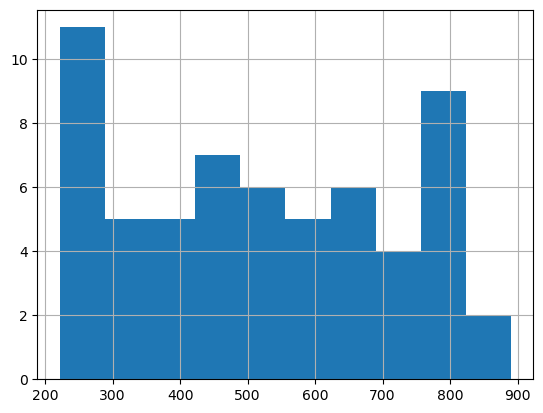

In [208]:
#visualize 
df_merge['Purchased'].hist()